<center> <h1> <span style="color:black"> IABE Data Science Certificate - Module 2 - Computer Lab 2  </h1> </center> 
<center> <h2> <span style="color:red"> Programming : bagging and random forests in Python </h1> </center>

# Agenda

* [Chapter 1 - Introduction](#one)
    + [1.1 Objective of the notebook](#one-one)
    + [1.2 Speakers](#one-two)
    + [1.3 IT requirements](#one-three)


* [Chapter 2 - Import of libraries and dataset](#two)
    + [2.1 Importing the libraries](#two-one)
    + [2.2 Importing the data](#two-two)

# Chapter 1 - Introduction <a name="one"></a>

## 1.1 Objective of the notebook <a name="one-one"></a>

The objectif of this notebook is to illustrate 
1. The bagging and Random Forrest algorithms 
2. How to tune these models on the Ames price Dataset
3. How to perform Random search and Grid search for hyper parameters tuning



## 1.2 Speakers<a name="one-two"></a>

- Samuel Mahy

Samuel Mahy is director at Reacfin and head of the Non-Life Center of Excellence. He holds a Master of Engineering in Applied Mathematics and a Master of Actuarial Sciences both from the University of Louvain.

contact : samuel.mahy@reacfin.com

- Michael Lecuivre

Michael Lecuivre is senior consultant Non-Life at Reacfin. He holds a Master of Physics and a Master of Actuarial Sciences both from the University of Louvain.  

contact : michael.lecuivre@reacfin.com

## 1.3 IT requirements <a name="one-three"></a>

First, download the notebooks by clicking [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/)



You then have two options to join the coding exercises covered during the computer labs.

**Google Colab - default!**

Google Colaboratory, or “Colab” for short, allows you to write and execute Python in your browser. Having a Google account you should be able to open the notebook and to run the python code cells. You can find [here](https://colab.research.google.com/drive/1xBHj08d1rj4C_IeMGXqwDz-sGGiis40F#scrollTo=rA-4zXBijbX3) a very simple notebook with some first exploratory steps of this research environment. You can store a copy of this notebook on your Google drive, or download a local copy.

To open the notebook you have downloaded from [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/) just perform the following steps : 
1. go to Google Colab :  https://colab.research.google.com/notebooks/intro.ipynb 
2. click on **File>Upload notebook**. 

To execute the code in a code cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more.

In colab many python libraries are already available by default. If a library is missing it can be installed as explained [here](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

**Local installation - optional**

We recommend obtaining your local installation of Python via the distribution platform Anaconda. Here you should

- download Anaconda at https://www.anaconda.com/distribution/#download-section, select the version for Python 3.8 and make sure to pick the right operating system (top of the page: select Windows, macOS or Linux)

- install Anaconda; this is straightforward after launching the installer, but (in case you are in doubt) some instructions are at https://docs.anaconda.com/anaconda/install/windows/.

To open the notebook you have downloaded [here](https://gitfront.io/r/katrienantonio/a29071bdc7b2f20f24268be573ef54b68c65168c/IABE-DS-module-1/) simply

1. Launch Anaconda
2. Launch Jupiter Notebook from Anaconda main screen
3. Open the notebook file stored on your computer

In Anaconda many python libraries are already available by default. If a library is missing it can be installed by typing **pip install [library]** in the Anaconda command prompt. In order to be able to run this command you have to install **pip** from [here](https://pip.pypa.io/en/stable/installing/)

# Chapter 2 - Import of libraries and datasets <a name="two"></a>

In this chapter, we will explain how to load the required libraries and datasets
<br><br>

## 2.1 Importing the libraries<a name="two-one"></a>

First we make sure we are running an up to date version of Pyhton (at least 3.8)

In this training we will use the **following libraries**: 

| Library | Definition | Url | pip command |
|----|----|----|----|
| Matplotlib | Python 2D plotting library that contains many submodules like pyplot, a matlab-like interface | https://matplotlib.org | pip install matplotlib |
| numpy | Fundamental package for scientific computing. Numpy allows the user to integrate C/C++ and Fortran code to Python projects | http://www.numpy.org/ | pip install numpy* |
| pandas | Provides high-performance, easy-to-use data structures and data analysis tools | https://pandas.pydata.org/ | pip install pandas |
| sklearn | Widely used machine learning library with classification, regression, clustering, model selection, preprocessing etc. | http://scikit-learn.org/ | pip install scikit-learn |
| seaborn | Allows to plot distributions| https://seaborn.pydata.org | pip install seaborn |

After installing the libraries through the use of **pip**, we still have to import them in the notebook for which we can use the `import` statement.

In [ ]:
import time

Basically, we know that we will have to use *pandas* library many times. To **improve the code readability**, we will also use the command `import pandas as pd`. This means that we will be able to use a pandas function using `pd.name_of_a_function`. We will apply the same manipulation for other packages as well such as package *numpy*.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

Some libraries, such as *sklearn*, are **too big for the use we will have**. Therefore, we prefer to import only one function at a time, *i.e.* *metrics*, from *sklearn*. The same logic is used for some other libraries:

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import tree

This approach has **several benefits**:

* Few functions (and their dependences) are loaded;
* We can just call the function by its name.

## 2.2 Importing the data <a name="two-two"></a>

For business case purposes, we will use the following datasets : 

- a dataset describing the sale of individual residential property in Ames, Iowa from 2006 to 2010 (more info [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))
- a dataset containing the claim history for Motor Third Party Liability insurance cover 

If we want to load these files in Python, we can use the function `read_csv()` which belongs to the panda library (which we abbreviated to `pd`)

In [ ]:
ames_python = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/ames_python.csv")
mtpl_python = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/PC_data.txt", delimiter = "\t")

We can check that the import was performed correctly by using the `head()` function.

In [ ]:
ames_python.head()

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [ ]:
mtpl_python.head()

,ID,NCLAIMS,AMOUNT,AVG,EXP,COVERAGE,FUEL,USE,FLEET,SEX,AGEPH,BM,AGEC,POWER,PC,TOWN,LONG,LAT
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


In [ ]:
print(ames_python.shape)
print(mtpl_python.shape)

(2930, 82)
(163231, 18)


We check if there is missing values.

In [ ]:
ames_python[ames_python.isnull().any(axis = 1)]

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude


In [ ]:
mtpl_python[mtpl_python.isnull().any(axis = 1)]

,ID,NCLAIMS,AMOUNT,AVG,EXP,COVERAGE,FUEL,USE,FLEET,SEX,AGEPH,BM,AGEC,POWER,PC,TOWN,LONG,LAT
1,2,0,0.0,NaN,1.00000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.0,NaN,1.00000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.0,NaN,1.00000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
5,6,0,0.0,NaN,1.00000,TPL,gasoline,private,N,male,26,11,12,70,1000,BRUSSEL,4.355223,50.845386
7,8,0,0.0,NaN,0.40274,TPL,gasoline,private,N,female,58,11,14,47,1000,BRUSSEL,4.355223,50.845386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163225,163226,0,0.0,NaN,1.00000,TPL,diesel,private,N,male,32,10,8,40,9990,MALDEGEM,3.421256,51.199975
163226,163227,0,0.0,NaN,1.00000,TPL,diesel,work,N,male,37,5,10,40,9990,MALDEGEM,3.421256,51.199975
163227,163228,0,0.0,NaN,1.00000,TPL,diesel,private,N,male,44,0,6,55,9990,MALDEGEM,3.421256,51.199975
163228,163229,0,0.0,NaN,1.00000,TPL,diesel,private,N,male,50,0,10,40,9990,MALDEGEM,3.421256,51.199975


## Chapter 3 - Random forest application <a class="anchor" id="three"></a>

## Chapter 3.1 - Introduction <a name="three-one"></a>

Ensembles are methods that combine multiple machine learning models to create more powerfull models. 

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. Random forests builds a large collection of de-correlated trees with bootstrapping, and then aggregates the decisions of individual trees.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision.

In this chapter, we consider the random forest technique in order to model the sale of individual residential.

## Chapter 3.2 - Modelling of the Sales Price <a name="three-two"></a>

### 3.2.1 Training and testing sets <a class="anchor" id="three-two-one"></a>

In [ ]:
pd.options.display.max_columns = 82
ames_python.describe(include='all')

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
count,2930.00000,2930,2930,2930.000000,2930.000000,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930,2930,2930,2930,2930,2930.000000,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,2930,2930,2930,2930.000000,2930.000000,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000,2930.000000,2930.000000
unique,NaN,16,7,NaN,NaN,2,3,4,4,3,5,3,28,9,8,5,8,10,9,NaN,NaN,6,8,16,17,5,NaN,4,5,6,6,6,5,7,NaN,7,NaN,NaN,NaN,6,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,6,7,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,5,5,6,NaN,NaN,NaN,10,6,NaN,NaN,NaN
top,NaN,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,NaN,NaN,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Average,Average,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,Typical,Typical,PConc,Typical,Typical,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Excellent,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Typical,NaN,Typ,NaN,No_Fireplace,Attchd,Unf,NaN,NaN,Typical,Typical,Paved,NaN,NaN,NaN,NaN,NaN,NaN,No_Pool,No_Fence,None,NaN,NaN,NaN,WD,Normal,NaN,NaN,NaN
freq,NaN,1079,2273,NaN,NaN,2918,2732,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,825,1654,NaN,NaN,2321,2887,1026,1015,1775,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,2885,1495,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,1422,1731,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,2917,2358,2824,NaN,NaN,NaN,2536,2413,NaN,NaN,NaN
mean,1465.50000,NaN,NaN,57.647782,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.096928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.177474,NaN,49.705461,559.071672,1051.255631,NaN,NaN,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431058,0.061092,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,NaN,NaN,1.766212,472.658362,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068,-93.642897,42.034482
std,845.96247,NaN,NaN,33.499441,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,178.634545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.233372,NaN,169.142089,439.540571,440.968018,NaN,NaN,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524762,0.245175,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,NaN,NaN,0.761137,215.187196,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357,0.025700,0.018410
min,1.00000,NaN,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.000000,1950.00

We will use the following expanatory variables to model the Sales Price:
- MS_Zoning
- Exter_Qual
- Year_Built
- Lot_Area 

In [ ]:
ames_python_2=ames_python[['MS_Zoning','Lot_Area','Year_Built','Exter_Qual','Sale_Price']]

We convert categorical variables to one-hot vectors with the `pd.get_dummies`function :
- `data` : Data of which to get dummy indicators.
- `drop_first` : Whether to get k-1 dummies out of k categorical levels by removing the first level.


In [ ]:
ames_python_3=pd.get_dummies(data=ames_python_2,drop_first=True)
ames_python_3.head()

,Lot_Area,Year_Built,Sale_Price,MS_Zoning_C_all,MS_Zoning_Floating_Village_Residential,MS_Zoning_I_all,MS_Zoning_Residential_High_Density,MS_Zoning_Residential_Low_Density,MS_Zoning_Residential_Medium_Density,Exter_Qual_Fair,Exter_Qual_Good,Exter_Qual_Typical
0,31770,1960,215000,0,0,0,0,1,0,0,0,1
1,11622,1961,105000,0,0,0,1,0,0,0,0,1
2,14267,1958,172000,0,0,0,0,1,0,0,0,1
3,11160,1968,244000,0,0,0,0,1,0,0,1,0
4,13830,1997,189900,0,0,0,0,1,0,0,0,1


We split the AMES dataset into a training and test set while preserving the distribution of the target variable. To do so, we can use `train_test_split` from `sklearn.model_selection`. We keep 20% of the database for testing. We want to obtain a stratified train-test split. A stratified train-test split allows to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

With the following function, we set different classes as observed in the original dataset.
- `np.linspace` : Return evenly spaced numbers over a specified interval.
- `pd.cut` : This function is also useful for going from a continuous variable to a categorical variable.

The function `train_test_split()` splits arrays or matrices into random train and test subsets.
- `DataFrame.drop` : Return new object with labels in requested axis removed.

In [ ]:
bins = np.linspace(ames_python.Sale_Price.min(),ames_python.Sale_Price.max(), 20)
y_cat = pd.cut(ames_python.Sale_Price,bins=bins,include_lowest=True) 

np.random.seed(123)

ames_python_X = ames_python_3.drop(labels=['Sale_Price'], axis=1) 
ames_python_X_train, ames_python_X_test, ames_python_y_train, ames_python_y_test = train_test_split(ames_python_X, ames_python_3.Sale_Price, test_size=0.2, stratify=y_cat)

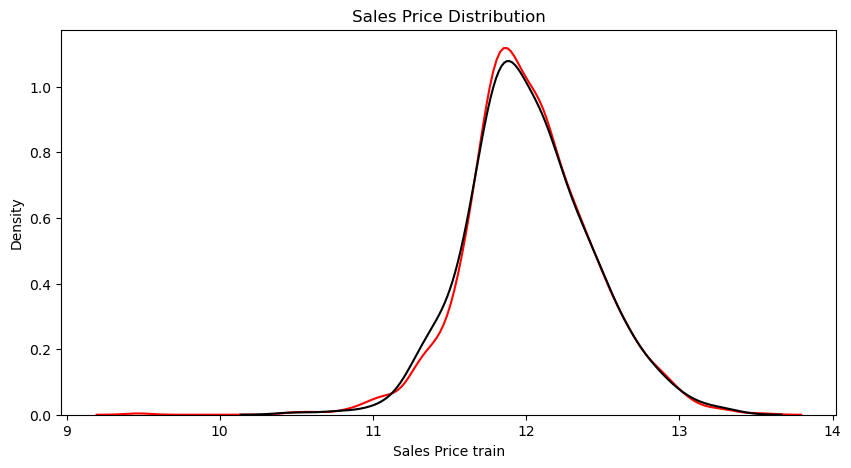

In [ ]:
#Create dataframe from different vector lengths
df1 = pd.DataFrame(ames_python_y_train)
df2= pd.DataFrame(ames_python_y_test)
plot_pd = pd.concat([df1,df2], ignore_index=True, axis=1)

#rename columns for x-label
plot_pd.columns = ['Sales Price train', 'Sales Price test']

#plot 
fig, axs = plt.subplots(ncols=1, figsize=(10,5))
sb.kdeplot(np.log(plot_pd['Sales Price train']), ax = axs, color='r').set(title='Sales Price Distribution')
sb.kdeplot(np.log(plot_pd['Sales Price test']), ax = axs, color='k')
plt.show()


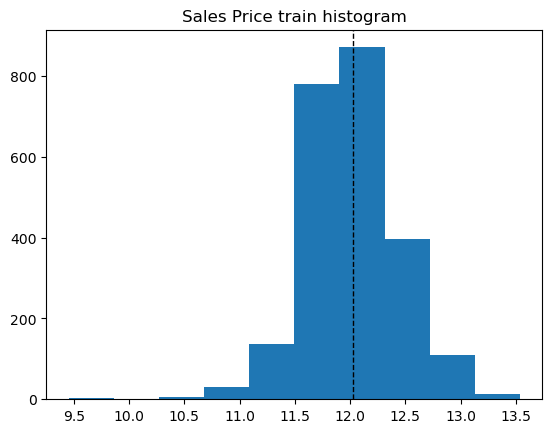

In [ ]:
plt.title('Sales Price train histogram')
plt.hist(np.log(plot_pd['Sales Price train']))
plt.axvline(np.log(plot_pd['Sales Price train']).mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

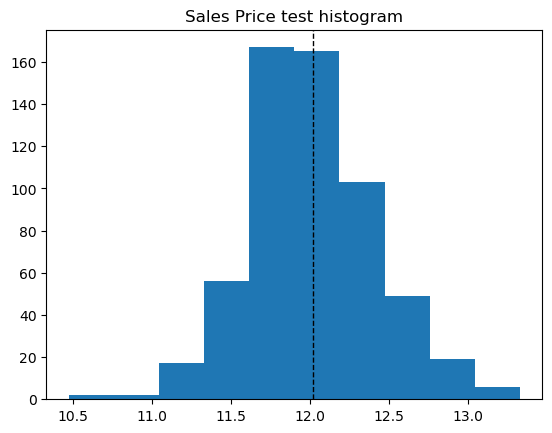

In [ ]:
plt.title('Sales Price test histogram')
plt.hist(np.log(plot_pd['Sales Price test']),label="Sales Price test")
plt.axvline(np.log(plot_pd['Sales Price test']).mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [ ]:
X_train=ames_python_X_train
Y_train=ames_python_y_train

X_test=ames_python_X_test
Y_test=ames_python_y_test

### 3.2.2 A decision tree <a class="anchor" id="three-two-two"></a>

We can fit a simple tree with the `DecisionTreeRegressor()` function from sklearn. 
* `criterion` : the function to measure the quality of a split
* `max_depth` : the maximum depth of the tree (allows to control the size of the tree)

In [ ]:
class_tree=DecisionTreeRegressor(criterion='squared_error',max_depth = 50, random_state = 0)

Let's train the model.

In [ ]:
# Starting time
start = time.time()
# Training
reg_tree=class_tree.fit(X_train, np.log(Y_train))
# Elapsed time
end = time.time()
print(end - start)

0.008975028991699219


In [ ]:
# Prediction
Y_pred_train = reg_tree.predict(X_train)
Y_pred_test = reg_tree.predict(X_test)

# Metrics
print("MSE on training set:", metrics.mean_squared_error(np.log(Y_train), Y_pred_train))
print("MSE on testing set:", metrics.mean_squared_error(np.log(Y_test), Y_pred_test))

MSE on training set: 0.0010983762171052655
MSE on testing set: 0.09888260981103926


Deep decision trees are really sensitive to the data they are trained and leads to high variance which is overfitting of data.

### 3.2.3 Bagging <a class="anchor" id="three-two-three"></a>

Bagging is the process of using bootstrapped samples with replacement and applying a model on each of them and then average out the results to avoid high variance.

Here, we apply a bagging regressor on a decision tree with the function `BaggingRegressor()`. The bagging regressor fits decision tree each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction. 
* `base_estimator` : the base estimator to fit on random subsets of the dataset (here a decision tree)
* `n_estimators` : The number of trees in the ensemble.

In [ ]:
class_bagging = BaggingRegressor(base_estimator=class_tree,n_estimators=100,random_state=0)
# Starting time
start = time.time()
# Training
reg_bagging=class_bagging.fit(X_train, np.log(Y_train))
# Elapsed time
end = time.time()
print(end - start)

0.5788974761962891


In [ ]:
# Prediction
Y_pred_train = reg_bagging.predict(X_train)
Y_pred_test = reg_bagging.predict(X_test)

print("MSE on training set:", metrics.mean_squared_error(np.log(Y_train), Y_pred_train))
print("MSE on testing set:", metrics.mean_squared_error(np.log(Y_test), Y_pred_test))

MSE on training set: 0.009750735478872369
MSE on testing set: 0.050652602272487746


### 3.2.4 A random forest <a class="anchor" id="three-two-four"></a>

In random forests, we consider only a subset of the features at each split. By doing so, decision trees will produce uncorrelated results. So random forests are based on the bagging process with uncorrelated trees (using uncorrelated trees will result in substantial reduction in variance).

We can fit a simple random forest with the `DecisionTreeClassifier()` function from sklearn. 
* `n_estimators` : the number of trees in the forest.
* `criterion` : the function to measure the quality of a split
* `max_depth` : the maximum depth of the tree (allows to control the size of the tree)
* `min_samples_split` : The minimum number of samples required to split an internal node
* `min_samples_leaf` : The minimum number of samples required to be at a leaf node. 
* `max_features` : The number of features to consider when looking for the best split

In [ ]:
class_rf = RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth = 50, max_features='sqrt',random_state = 0)
# Starting time
start = time.time()
# Training
reg_rf=class_rf.fit(X_train, np.log(Y_train))
# Elapsed time
end = time.time()
print(end - start)

0.3824489116668701


In [ ]:
# Prediction
Y_pred_train = reg_rf.predict(X_train)
Y_pred_test = reg_rf.predict(X_test)

print("MSE on training set:", metrics.mean_squared_error(np.log(Y_train), Y_pred_train))
print("MSE on testing set:", metrics.mean_squared_error(np.log(Y_test), Y_pred_test))

MSE on training set: 0.009667340348504517
MSE on testing set: 0.0495942020251307


## Chapter 3.3 - Hyperparameter Tuning <a name="three-three"></a>

Parameters which define the model architecture are referred to as hyperparameters. Hyperparameter tuning is the process of searching for the ideal model architecture. Hyperparameters are learned during data training when we optimize a loss function depending of the model results and predictions.

Hyperparameter tuning includes differents steps :
1) Define a model (here, we use a random forest)
 
2) Define the range of possible values for all hyperparameters
 
3) Define a method for sampling hyperparameter values (random or grid search)
 
4) Define a criteria or a loss funcion to judge the model (here we use the mse loss function)

5) Define a cross-validation method 

In the following section, we want to tune two hyperparameters:
* the number of trees in the random forest
* the minimum number of samples per leaf in each tree of the random forest



### 3.3.1 Range of possible values <a name="three-three-one"></a>

#### 3.3.1.a Impact of the number of trees <a name="three-three-one-a"></a>

Let's use k-fold cross-validation in order to determine a relevant number of trees.

We want to test the model with 1, 10, 20 up to 100 trees.

__Runtime:__ Be carefull that k-fold cross-validation can take some time according to the complexity of the model, *i.e.* the number of trees in the forest.

In [ ]:
num_trees = np.append([1], np.arange(10, 101, 10))
num_trees

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

We do k-fold with $k = 5$.

In [ ]:
num_k_fold = 5

We record the training and testing MSE and Poisson deviance in a data frame.

In [ ]:
scores = pd.DataFrame(columns = ['Number of trees', 'MSE (testing)', 'MSE (training)'],
                      data = np.zeros((num_k_fold * len(num_trees), 3)))
scores.head()

,Number of trees,MSE (testing),MSE (training)
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


For each number of trees in `num_trees`, we do k-fold cross-validation.

In [ ]:
# Starting time
start_global = time.time()

# Loop over the number of trees
for j in range(len(num_trees)):
    i = 0
    
    # Initiate k-fold object
    kf = KFold(n_splits = num_k_fold, shuffle = True)
    
    # Record starting time
    start = time.time()
    
    # k-fold cross-validation for the selected number of trees
    for train, test in kf.split(X_train):
        # Select training and testing subsets
        X_train_cv, Y_train_cv = X_train.iloc[train], Y_train.iloc[train]
        X_test_cv, Y_test_cv= X_train.iloc[test], Y_train.iloc[test]
        
        # Training
        class_rf = RandomForestRegressor(criterion = "squared_error", max_features = "sqrt",
                                   n_estimators = num_trees[j],max_depth = 50, random_state = 0, n_jobs = 1)
        reg_rf=class_rf.fit(X_train_cv, np.log(Y_train_cv))
        
        # Prediction
        Y_pred_train = reg_rf.predict(X_train_cv)
        Y_pred_test = reg_rf.predict(X_test_cv)

        # Metrics
        index = j * num_k_fold + i
        scores.at[index, 'Number of trees'] = num_trees[j]
        scores.at[index, 'MSE (testing)'] = metrics.mean_squared_error(np.log(Y_test_cv) , Y_pred_test)
        scores.at[index, 'MSE (training)'] = metrics.mean_squared_error(np.log(Y_train_cv) , Y_pred_train)
        i = i + 1
    
    # Elasped time for the k-fold step
    end = time.time()
    elapsed = end - start
    print('Step', j + 1, 'completed (', elapsed, 'sec)...')

# Global elapsed time
end_global = time.time()
elapsed = end_global - start_global
print('Total time:', elapsed, 'sec!')

Step 1 completed ( 0.09075665473937988 sec)...
Step 2 completed ( 0.24203801155090332 sec)...
Step 3 completed ( 0.41002893447875977 sec)...
Step 4 completed ( 0.6755990982055664 sec)...
Step 5 completed ( 0.8863747119903564 sec)...
Step 6 completed ( 1.0424423217773438 sec)...
Step 7 completed ( 1.2717292308807373 sec)...
Step 8 completed ( 1.4608368873596191 sec)...
Step 9 completed ( 1.5653374195098877 sec)...
Step 10 completed ( 1.7106475830078125 sec)...
Step 11 completed ( 1.8571841716766357 sec)...
Total time: 11.217977285385132 sec!


In [ ]:
gp = scores.groupby('Number of trees')
means = gp.mean()
means

,MSE (testing),MSE (training)
Number of trees,,
1.0,0.114739,0.044352
10.0,0.071289,0.012888
20.0,0.067063,0.011031
30.0,0.067009,0.010256
40.0,0.065463,0.010102
50.0,0.063688,0.009934
60.0,0.064096,0.009820
70.0,0.065300,0.009907
80.0,0.064184,0.009627


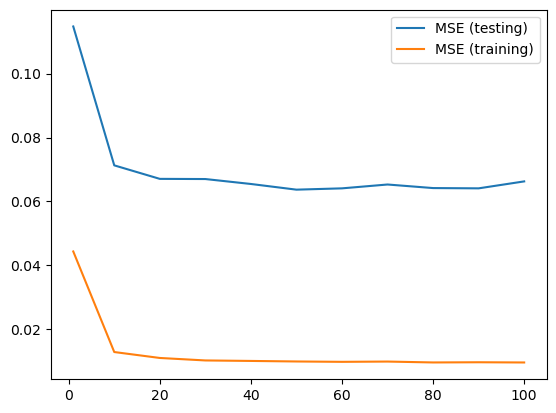

In [ ]:
measures = ['MSE (testing)','MSE (training)']
plt.figure()
plt.plot(means[measures])
plt.legend(measures)
plt.show()

#### 3.3.1.b Impact of the minimum number of samples per leaf <a name="three-three-one-b"></a>

As an exercise, let's use k-fold cross-validation in order to determine a relevant minimum number of samples per leaf.

* Test for 1, 50, 100, 150, up to 500 as the minimum number of samples per leaf.
* Consider a k-fold cross-validation with $k = 5$.

Be carefull that k-fold cross-validation can take some time according to the complexity of the model, *i.e.* the minimum number of samples per leaf in each tree.

In [ ]:
min_sample_per_leaf = np.append([1],np.arange(start = 50, stop = 501, step = 50))
min_sample_per_leaf

array([  1,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [ ]:
num_k_fold = 5

In [ ]:
scores = pd.DataFrame(columns = ['Min samples per leaf', 'MSE (testing)', 'MSE (training)',],
                      data = np.zeros((num_k_fold * len(min_sample_per_leaf), 3)))
scores.head()

,Min samples per leaf,MSE (testing),MSE (training)
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


For each minimum number of samples per leaf in `min_sample_per_leaf`, do the k-fold cross-validation.

In [ ]:
# Starting time
start_global = time.time()

# Loop over the number of minimum number of samples per leaf
for j in range(len(min_sample_per_leaf)):
    i = 0
    
    # Initiate k-fold object
    kf = KFold(n_splits = num_k_fold, shuffle = True)
    
    # Record starting time
    start = time.time()
    
    # k-fold cross-validation for the selected minimum number of samples per leaf
    for train, test in kf.split(X_train):
        # Select training and testing subsets
        X_train_cv, Y_train_cv = X_train.iloc[train], Y_train.iloc[train]
        X_test_cv, Y_test_cv = X_train.iloc[test], Y_train.iloc[test]
        
        # Training
        class_rf = RandomForestRegressor(criterion = "squared_error", max_features = "sqrt",
                                   n_estimators = 2, min_samples_leaf = min_sample_per_leaf[j],
                                   random_state = 0, n_jobs = 1)
        reg_rf=class_rf.fit(X_train_cv, np.log(Y_train_cv))
        
        # Prediction
        Y_pred_train = reg_rf.predict(X_train_cv)
        Y_pred_test = reg_rf.predict(X_test_cv)

        # Metrics
        index = j * num_k_fold + i
        scores.at[index, 'Min samples per leaf'] = min_sample_per_leaf[j]
        scores.at[index, 'MSE (testing)'] = metrics.mean_squared_error(np.log(Y_test_cv), Y_pred_test)
        scores.at[index, 'MSE (training)'] = metrics.mean_squared_error(np.log(Y_train_cv), Y_pred_train)
        i = i + 1
    
    # Elasped time for the k-fold step
    end = time.time()
    elapsed = end - start
    print('Step', j + 1, 'completed (', elapsed, 'sec)...')

# Global elapsed time
end_global = time.time()
elapsed = end_global - start_global
print('Total time:', elapsed, 'sec!')

Step 1 completed ( 0.07859086990356445 sec)...
Step 2 completed ( 0.07081961631774902 sec)...
Step 3 completed ( 0.05487251281738281 sec)...
Step 4 completed ( 0.0528569221496582 sec)...
Step 5 completed ( 0.06382989883422852 sec)...
Step 6 completed ( 0.053858280181884766 sec)...
Step 7 completed ( 0.055013179779052734 sec)...
Step 8 completed ( 0.061810970306396484 sec)...
Step 9 completed ( 0.052858829498291016 sec)...
Step 10 completed ( 0.0499272346496582 sec)...
Step 11 completed ( 0.05881357192993164 sec)...
Total time: 0.6562225818634033 sec!


Group the results according to the minimum number of samples per leaf and compute the average errors.

In [ ]:
gp = scores.groupby('Min samples per leaf')
means = gp.mean()
means

,MSE (testing),MSE (training)
Min samples per leaf,,
1.0,0.089770,0.025149
50.0,0.078827,0.075561
100.0,0.083181,0.079795
150.0,0.087845,0.085546
200.0,0.091274,0.090724
250.0,0.100221,0.098814
300.0,0.102429,0.102004
350.0,0.103844,0.102973
400.0,0.113569,0.114066


Plot the MSE for the testing set according to the minimum number of samples per leaf.

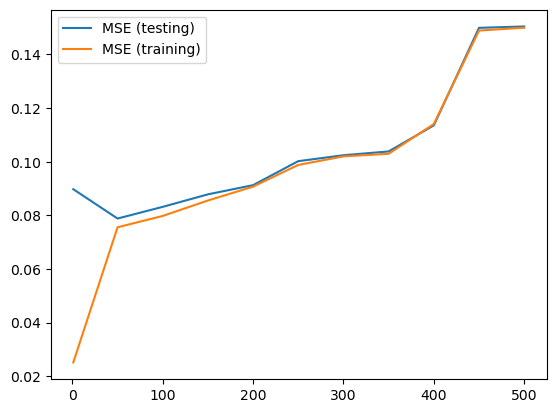

In [ ]:
measures = ['MSE (testing)','MSE (training)']
plt.figure()
plt.plot(means[measures])
plt.legend(measures)
plt.show()

### 3.3.2 Hypertuning of the number of trees and the minimum sample leaf <a name="three-three-two"></a>

#### 3.3.2.a Random search in the 2D parameters space <a name="three-three-two-a"></a>

In [ ]:
num_trees = np.append([1], np.arange(10, 101, 10))
min_sample_per_leaf = np.append([1],np.arange(start = 50, stop = 501, step = 50))

random_grid = {'n_estimators': num_trees,
               'min_samples_leaf': min_sample_per_leaf}
random_grid

{'n_estimators': array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 'min_samples_leaf': array([  1,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500])}

`RandomizedSearchCV` implements a randomized search on two hyper parameters (n_estimators,min_samples_leaf):

In [ ]:
class_rf = RandomForestRegressor(random_state=0)
class_rf_random = RandomizedSearchCV(estimator = class_rf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=0, n_jobs = -1,scoring='neg_mean_squared_error')
reg_rf_random=class_rf_random.fit(X_train, np.log(Y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
reg_rf_random.best_params_

{'n_estimators': 80, 'min_samples_leaf': 1}

In [ ]:
best_index = np.nonzero(reg_rf_random.cv_results_["rank_test_score"] == 1)[0][0]

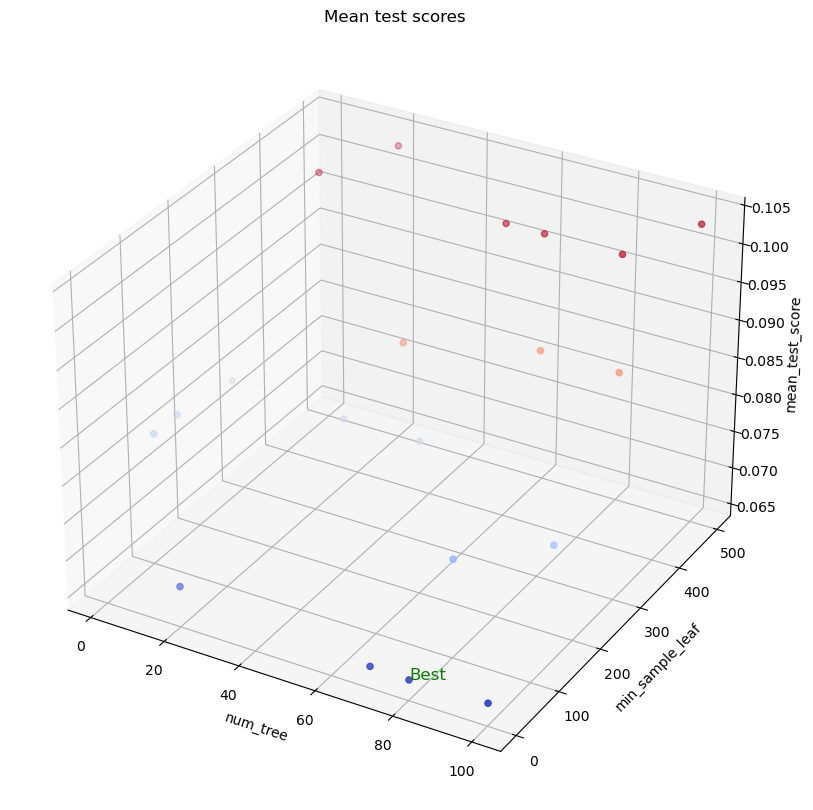

In [ ]:
X = reg_rf_random.cv_results_["param_n_estimators"].data.astype(int)
Y = reg_rf_random.cv_results_["param_min_samples_leaf"].data.astype(int)
Z=-reg_rf_random.cv_results_["mean_test_score"].astype(float)

fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z,marker='o',c=Z,cmap = cm.coolwarm)
ax.text(X[best_index], Y[best_index], Z[best_index], "Best", color='green',size='large')

plt.title('Mean test scores')
ax.set_xlabel('num_tree')
ax.set_ylabel('min_sample_leaf')
ax.set_zlabel('mean_test_score')

plt.show()

The mean test score for the tuned hyperparameters :

In [ ]:
Z[best_index]

0.06607747771930346

#### 3.3.2.b Grid search around the best parameters found during the random search <a name="three-three-two-b"></a>

In [ ]:
param_grid = {'n_estimators': np.arange(start = 60, stop = 101, step = 2),
               'min_samples_leaf': np.append([1],np.arange(start = 5, stop = 51, step = 5))}
param_grid

{'n_estimators': array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100]),
 'min_samples_leaf': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}

In [ ]:
class_rf = RandomForestRegressor(random_state=0)
reg_rf_grid = GridSearchCV(estimator = class_rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
reg_rf_grid.fit(X_train, np.log(Y_train))

Fitting 5 folds for each of 231 candidates, totalling 1155 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'min_samples_leaf': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                         'n_estimators': array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
        86,  88,  90,  92,  94,  96,  98, 100])},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
reg_rf_grid.best_params_

{'min_samples_leaf': 5, 'n_estimators': 62}

In [ ]:
reg_rf_grid.best_score_

-0.061027962350032515

In [ ]:
best_index = np.nonzero(reg_rf_grid.cv_results_["rank_test_score"] == 1)[0][0]

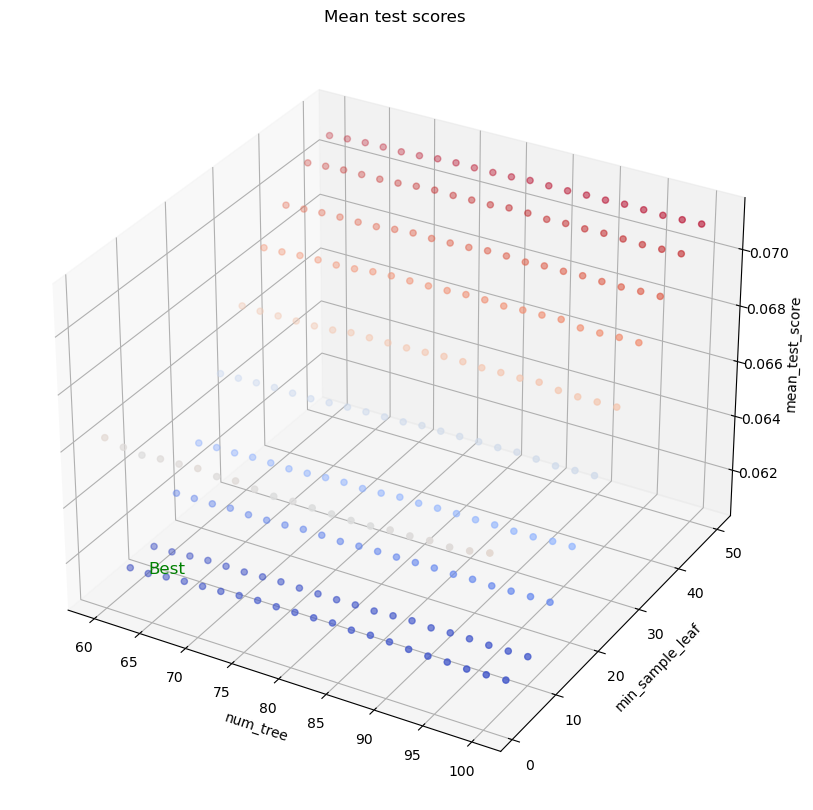

In [ ]:
X = reg_rf_grid.cv_results_["param_n_estimators"].data.astype(int)
Y = reg_rf_grid.cv_results_["param_min_samples_leaf"].data.astype(int)
Z=-reg_rf_grid.cv_results_["mean_test_score"].astype(float)

fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z,marker='o',c=Z,cmap = cm.coolwarm)
ax.text(X[best_index], Y[best_index], Z[best_index], "Best", color='green',size='large')

plt.title('Mean test scores')
ax.set_xlabel('num_tree')
ax.set_ylabel('min_sample_leaf')
ax.set_zlabel('mean_test_score')

plt.show()

The mean test score for the tuned hyperparameters :

In [ ]:
Z[best_index]

0.061027962350032515

## Chapter 3.4 - Random forest interpretation  <a name="three-four"></a>

We implement a random forest with the tuned hyperparameters.

In [ ]:
class_rf = RandomForestRegressor(n_estimators=reg_rf_grid.best_params_['n_estimators'],
                                 min_samples_leaf=reg_rf_grid.best_params_['min_samples_leaf'],
                                 criterion='squared_error',max_depth = 50, max_features='sqrt',random_state = 0)

# Starting time
start = time.time()
# Training
reg_rf=class_rf.fit(X_train, np.log(Y_train))
# Elapsed time
end = time.time()
print(end - start)

0.1291978359222412


In [ ]:
# Prediction
Y_pred_train = reg_rf.predict(X_train)
Y_pred_test = reg_rf.predict(X_test)

print("MSE on training set:", metrics.mean_squared_error(np.log(Y_train), Y_pred_train))
print("MSE on testing set:", metrics.mean_squared_error(np.log(Y_test), Y_pred_test))

MSE on training set: 0.04716960654188793
MSE on testing set: 0.048550343241973354


### 3.4.1 Variable importance measures <a class="anchor" id="three-four-one"></a>

Variable importance refers to how much the random forest relies on a variable to make predictions. Variable importance mesuares evaluate how important a variable is for random forest.

Let's take a look at the variable importance measures.

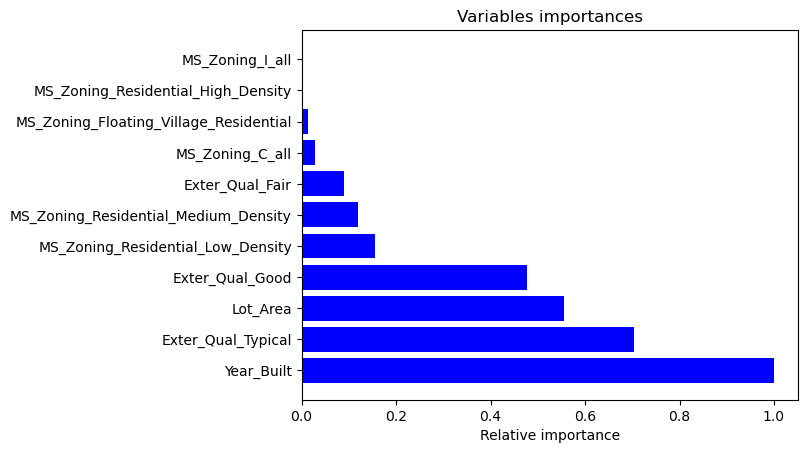

In [ ]:
# Features' names
features = list(X_train)

# Importance measures
importances = reg_rf.feature_importances_

# We sort the features by highest importance
indices = np.flip(np.argsort(importances))


#Plot
plt.title('Variables importances')
plt.barh(range(len(indices)), importances[indices] / importances[indices[0]], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

### 3.4.2 Partial Dependence plots (PDP) <a class="anchor" id="three-four-two"></a>

A PDP shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A PDP can show whether the relationship between the target and a feature is linear, monotonic or more complex. 

A flat PDP indicates that the feature is not important.

<Figure size 8000x7000 with 0 Axes>

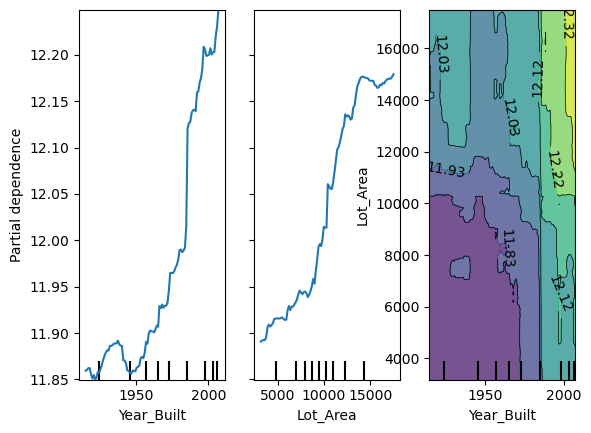

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

#labels=np.flip(features)
labels=['Year_Built', 'Lot_Area',('Year_Built', 'Lot_Area')]

plt.figure(figsize=(80,70))
PartialDependenceDisplay.from_estimator(reg_rf, X_train, labels)
plt.show()